In [1]:
from keras import losses
from model import neural_voice_judgment_model

model = neural_voice_judgment_model()
model.build((None, 128, 128, 1))
model.summary()
model.compile(optimizer='adam',loss=losses.CategoricalCrossentropy(), metrics=['categorical_accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 8)       208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 100)       4

In [2]:
import numpy as np
from sample_yomikomi import sample_all_data
from keras.callbacks import EarlyStopping

input_output_data = sample_all_data()
data_deformation = list(zip(*input_output_data))
x=np.asarray(data_deformation[0])
y=np.asarray(data_deformation[1])
callback = EarlyStopping(patience=10)
sample_fit_data = model.fit(x=x,y=y,epochs=500)


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 3.7813 - categorical_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 1s 501ms/step - loss: 0.8132 - categorical_accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 491ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 493ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 1s 528ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 1s 603ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 1s 518ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 464ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 465ms/step - loss: 0.0000e+00 - c

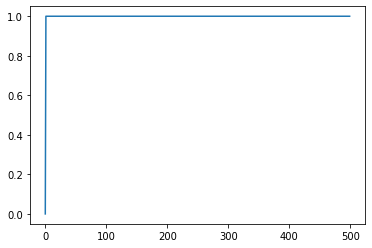

In [6]:
import matplotlib.pyplot as plt
plt.plot(sample_fit_data.history["categorical_accuracy"])
